## Proceso de Entrenamiento de Modelo y Predicción de Valores

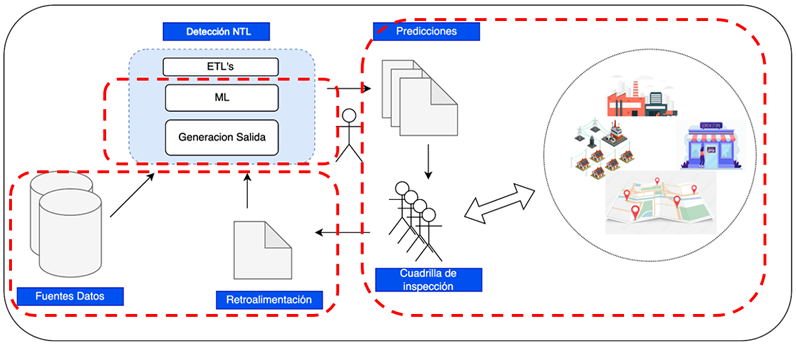

En esta notebook se llevan a cabo las siguientes tareas:
1. **Entrenamiento del modelo LGBM** con los últimos datos registrados de inspecciones
2. **Predicción o Inferencia** utilizando el modelo entrenado y los últimos datos de consumo

In [1]:
######## CONFIGURACIONES PRELIMINARES ##########
import os
import pandas as pd
import warnings
import io
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format #evita que muestre notacion cientifica
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
module_path = os.path.abspath(os.path.join('../../'))
import sys
if module_path not in sys.path:
    sys.path.append(module_path)
from src.modeling import train_predict

#### PASO DE ENTRENAMIENTO
En esta fase se efectúa el entrenamiento del modelo *LGBM* con los datos existentes en el dataset de series etiquetadas. Dichas series de consumo son aquellas a las que se le agregaron las features temporales y se etiquetaron de acuerdo a los últimos resultados de inspecciones. Se trabaja sobre el resultado de uno de los últimos pasos del proceso de *ETL* (*Procesamiento de dataset final para entrenamiento*), y las variables existentes en estos conjuntos son las que resultaron seleccionadas en el paso de selección de variables por el método Boruta.

In [2]:
%%time
X_train, X_test, y_train, y_test, cols_for_model, lgbm_model = train_predict.train_lgbm_model()

---Entrenamiento modelo LGBM sobre Dataset---

Best score reached: 0.9244218387476207 with params: {'lgbmclassifier__colsample_bytree': 0.5724726792874275, 'lgbmclassifier__learning_rate': 0.09042371348412374, 'lgbmclassifier__max_bin': 128, 'lgbmclassifier__max_depth': 5, 'lgbmclassifier__min_child_samples': 240, 'lgbmclassifier__min_child_weight': 0.001, 'lgbmclassifier__num_leaves': 40, 'lgbmclassifier__reg_alpha': 5, 'lgbmclassifier__reg_lambda': 0.001, 'lgbmclassifier__scale_pos_weight': 5, 'lgbmclassifier__subsample': 0.8087445946527063, 'lgbmclassifier__subsample_freq': 11} 
Dimensiones X: (70344, 114), Dimensiones y: (70344,)
---Finalizado: Entrenamiento modelo LGBM sobre Dataset---
CPU times: total: 7min 10s
Wall time: 1min 33s


#### FASE DE INFERENCIA
Esta es la fase final del proceso de predicción de instalaciones fraudulentas. Aquí se emite el *Reporte de Índice de Riesgo*, que asigna un valor de probabilidad a cada instalación sobre el mes de los últimos consumos registrados, mediante la aplicación del modelo LGBM entrenado con los datos más actuales de inspecciones.

In [2]:
%%time
import pandas as pd
series_features_mes = pd.read_parquet('../../data/historico/df_series_features_mes.parquet')
reporte_predicciones = train_predict.predicciones_mes(num_resultados=10000)

Iniciando carga de modelo y predicción de valores
Agregando datos de localización
Ordenando listado por índice de riesgo
--- Finalizada la predicción de índice de riesgo de fraude para el mes ---
CPU times: total: 8min 28s
Wall time: 8min 19s
